##Методические указания

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

In [ ]:
x.head(4)

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
Name: 0, dtype: float64

In [ ]:
y.head(4)

0    101.159902
1     78.442913
2   -159.238195
3    120.719533
Name: 0, dtype: float64

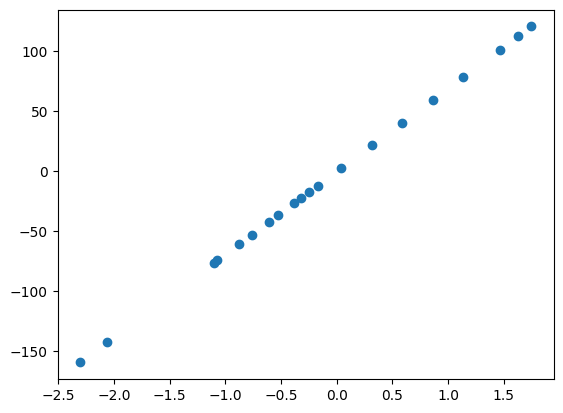

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [ ]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


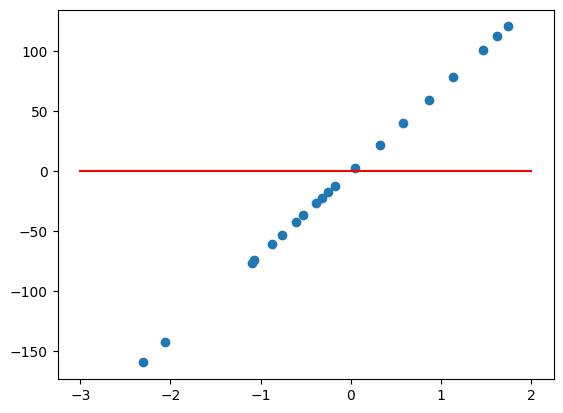

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


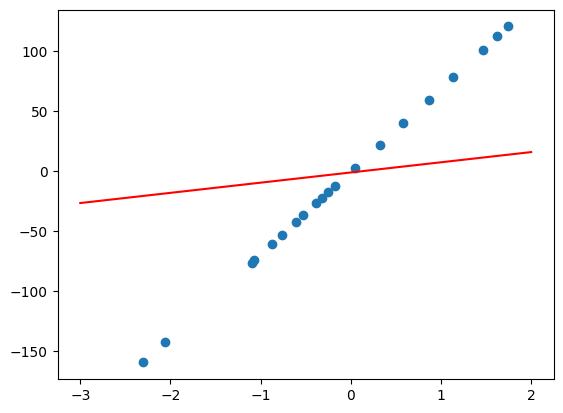

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


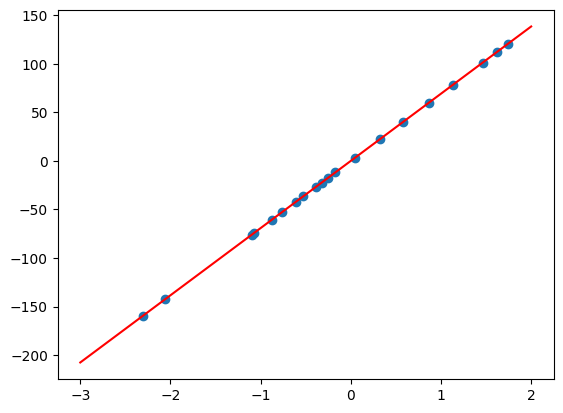

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

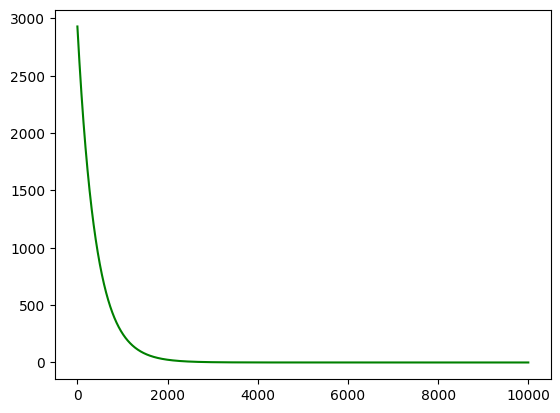

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

##Задания для самостоятельного выполнения

1) Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.


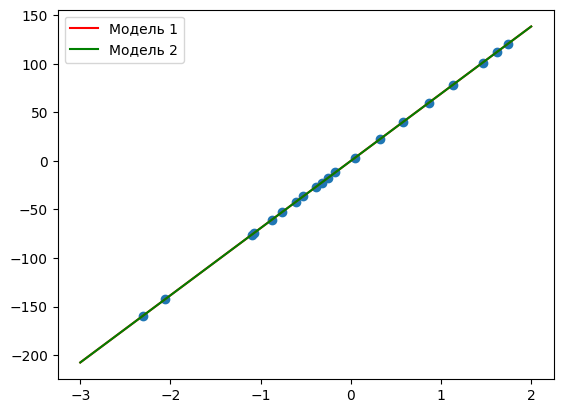

In [ ]:
hyp1 = Model()
hyp1.b0 = 5
hyp1.b1 = 5

hyp2 = Model()
hyp2.b0 = -1
hyp2.b1 = -1

steps1, errors1 = hyp1.fit(x, y)
steps2, errors2 = hyp2.fit(x, y)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, hyp1.predict(X0), 'r', label="Модель 1")
plt.plot(X0, hyp2.predict(X0), 'g', label="Модель 2")
plt.legend()
plt.show()

2) Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

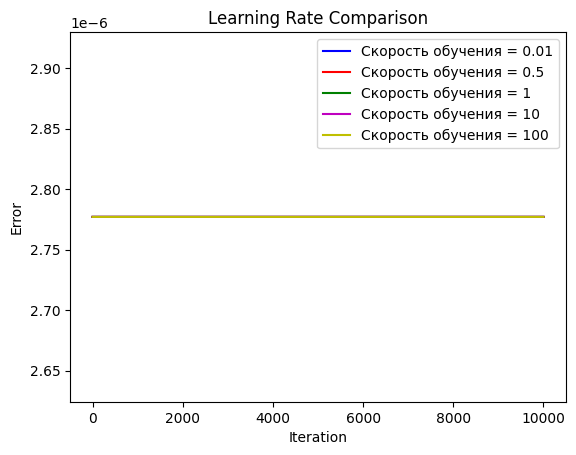

In [ ]:
hyp3 = Model()
steps3, errors3 = hyp3.fit(x, y, alpha=0.01)

hyp4 = Model()
steps4, errors4 = hyp4.fit(x, y, alpha=0.5)


hyp5 = Model()
steps5, errors5 = hyp5.fit(x, y, alpha=1)


hyp6 = Model()
steps6, errors6 = hyp6.fit(x, y, alpha=10)


hyp7 = Model()
steps7, errors7 = hyp7.fit(x, y, alpha=100)


plt.figure()
plt.plot(steps3, errors3, 'b', label="Скорость обучения = 0.01")
plt.plot(steps4, errors4, 'r', label="Скорость обучения = 0.5")
plt.plot(steps5, errors5 , 'g', label="Скорость обучения = 1")
plt.plot(steps6, errors6, 'm', label="Скорость обучения = 10")
plt.plot(steps7, errors7, 'y', label="Скорость обучения = 100")

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Learning Rate Comparison')
plt.show()


3) Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

error after gradient descent: 0.03937321303112905


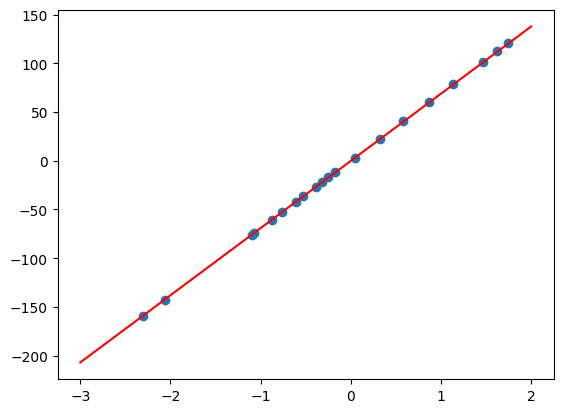

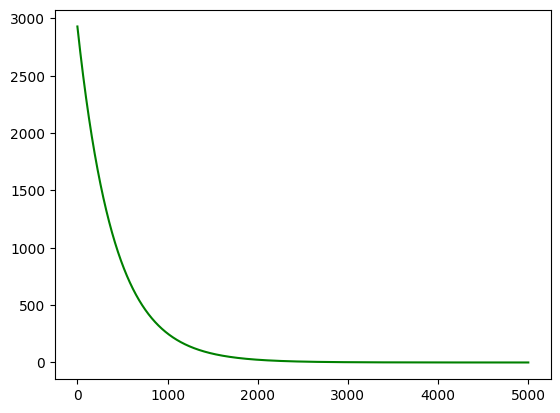

In [ ]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        if isinstance(X, pd.Series):  # Series в DataFrame
            X = X.to_frame()
        return self.b0 + self.b1 * X.iloc[:, 0]

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.Series):  # Series в DataFrame
            X = X.to_frame()

        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X.iloc[:, 0]) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if new_err < accuracy:
                break
        return steps, errors


x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(-3, 2, 100)
X0_df = pd.DataFrame({'X': X0})
Y0 = hyp.predict(X0_df)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()


4) Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = X.to_frame()
        return self.b0 + self.b1 * X.iloc[:, 0]

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, accuracy=0.000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.to_frame()

        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)

        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X.iloc[:, 0]) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if abs(prev_err - new_err) < accuracy:
                print("Достигнута заданная точность.")
                break
            prev_err = new_err
        else:
            print("Достигнуто максимальное количество шагов.")
        return steps, errors


x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace


Достигнуто максимальное количество шагов.
error after gradient descent: 0.03937321303112905


5) Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

Алгоритм градиентного спуска, как вы реализовали его, завершается всегда - либо если ошибка перестает существенно меняться (сравнивается изменение ошибки с **accuracy**), либо при достижении максимального количества шагов (условие **for _ in range(max_steps)**).

Ваш код гарантирует, что градиентный спуск завершится, и он не будет выполняться бесконечно. Вы установили два условия завершения:

Если изменение ошибки меньше accuracy, то цикл завершается (**if abs(prev_err - new_err) < accuracy**).

Если количество выполненных итераций достигает max_steps, то цикл завершается (**for _ in range(max_steps)**).

Таким образом, градиентный спуск завершается, когда одно из этих условий выполняется, что обеспечивает корректное завершение алгоритма.

6) Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

Достигнута заданная точность.
Ошибка после градиентного спуска: 1.6929888724214915e-13


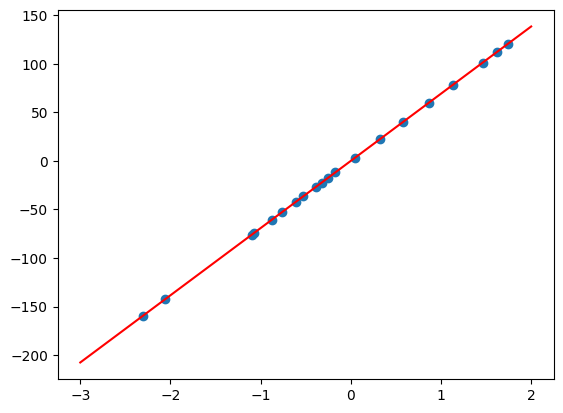

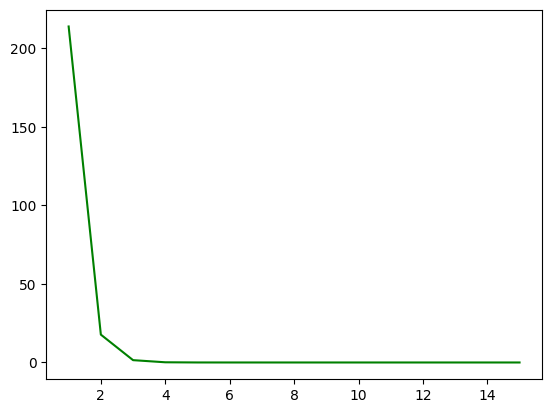

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = X.to_frame()
        return self.b0 + self.b1 * X.iloc[:, 0]

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y, alpha=1.0, accuracy=0.00000000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.to_frame()

        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)

        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X.iloc[:, 0]) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if new_err > prev_err:
                alpha /= 2  # Уменьшаем скорость обучения в 2 раза
                print(f"Уменьшение скорости обучения до {alpha}")
                # Сбрасываем параметры и начинаем заново
                self.b0 = 0
                self.b1 = 0
                prev_err = self.error(X, Y)
                continue

            if abs(prev_err - new_err) < accuracy:
                print("Достигнута заданная точность.")
                break

            prev_err = new_err

        else:
            print("Достигнуто максимальное количество шагов.")
        return steps, errors


x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("Ошибка после градиентного спуска:", J)

X0 = np.linspace(-3, 2, 100)
X0_df = pd.DataFrame({'X': X0})
Y0 = hyp.predict(X0_df)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()


7) Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

Достигнута заданная точность.
Ошибка после градиентного спуска: 4.1772608368551725e-08


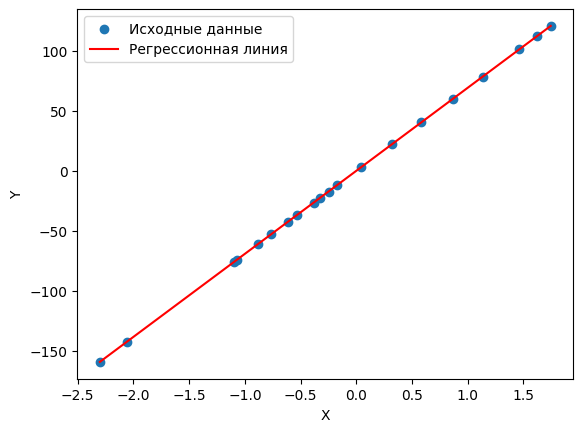

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        if isinstance(X, pd.Series):
            X = X.values
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y, alpha=1.0, accuracy=0.000001, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values

        steps, errors = [], []
        step = 0
        prev_err = self.error(X, Y)

        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            if new_err > prev_err:
                alpha /= 2
                print(f"Уменьшение скорости обучения до {alpha}")
                self.b0 = 0
                self.b1 = 0
                prev_err = self.error(X, Y)
                continue

            if abs(prev_err - new_err) < accuracy:
                print("Достигнута заданная точность.")
                break

            prev_err = new_err

        else:
            print("Достигнуто максимальное количество шагов.")
        return steps, errors

    def plot(self, X, Y):
        plt.figure()
        plt.scatter(X, Y, label="Исходные данные")
        X_min, X_max = min(X), max(X)
        Y_min = self.predict(X_min)
        Y_max = self.predict(X_max)
        plt.plot([X_min, X_max], [Y_min, Y_max], 'r', label="Регрессионная линия")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.show()


x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0'].values
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0'].values

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("Ошибка после градиентного спуска:", J)

hyp.plot(x, y)
